In [1]:
# Load necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
%matplotlib inline

/Users/abdallaheid/anaconda3/envs/DSSSWS2324/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the wine dataset
winequality_df = pd.read_csv("winequality-red.csv")

print(winequality_df.shape)

# Display the first 10 rows of the data
winequality_df.head(10)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
# Method 1, Apply PCA to the winequality dataset

X = winequality_df.iloc[:, :-1]
y = winequality_df.iloc[:, -1]

print(f"Dataset shape is: {X.shape}")
print(f"target shape is {y.shape}")

print("Unique values of the target variable are: ", sorted(y.unique()))

X.head()

Dataset shape is: (1599, 11)
target shape is (1599,)
Unique values of the target variable are:  [3, 4, 5, 6, 7, 8]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
# Create the Scaler object
scaler = StandardScaler()

# calculate the mean and standrad deviaion
scaler.fit(X)

# Transform the value
X_scaled = scaler.transform(X)

In [5]:
# Test PCA for all features
pca_11 = PCA(n_components=11, random_state=2020)
pca_11.fit(X_scaled)
X_pca_11 = pca_11.transform(X_scaled)

In [6]:
print("The vairance by all 11 principle components= ", sum(pca_11.explained_variance_ratio_ * 100))

The vairance by all 11 principle components=  99.99999999999999


In [7]:
pca_11.explained_variance_ratio_ * 100

array([28.17393128, 17.50826991, 14.0958499 , 11.02938664,  8.72083701,
        5.99643877,  5.3071929 ,  3.84506091,  3.13311015,  1.64848333,
        0.5414392 ])

In [8]:
np.cumsum(pca_11.explained_variance_ratio_ * 100)

array([ 28.17393128,  45.68220118,  59.77805108,  70.80743772,
        79.52827474,  85.52471351,  90.83190641,  94.67696732,
        97.81007747,  99.4585608 , 100.        ])

In [9]:
pca_2 = PCA(n_components=2, random_state=2020)
pca_2.fit(X_scaled)
x_pca_2 = pca_2.transform(X_scaled)

print(x_pca_2.shape)

(1599, 2)


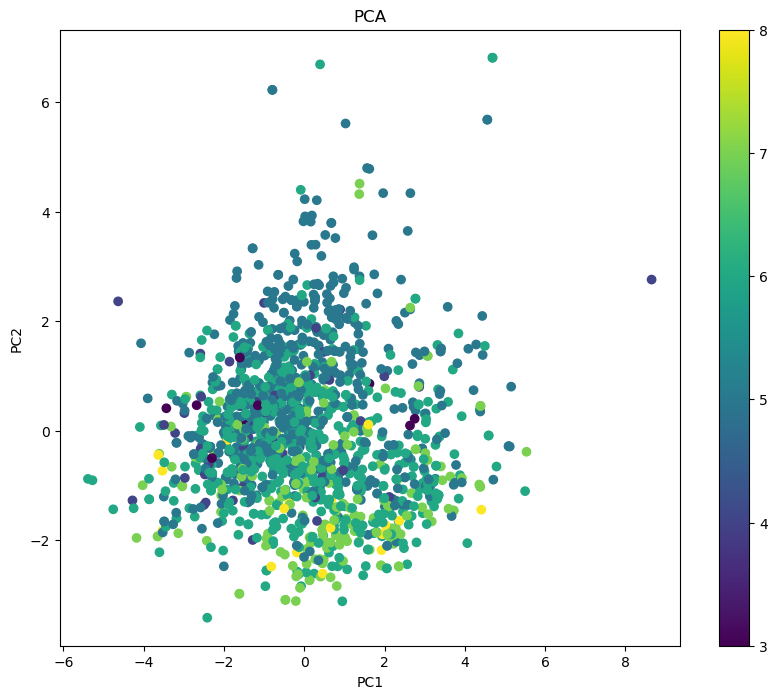

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(x_pca_2[:, 0], x_pca_2[:, 1], c=y, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt.colorbar()
plt.show()

In [13]:
# Method 2 TSNE Dim Reduction
X_embedded = TSNE(n_components=2, learning_rate="auto", perplexity=40).fit_transform(X_scaled)

X_embedded.shape

(1599, 2)

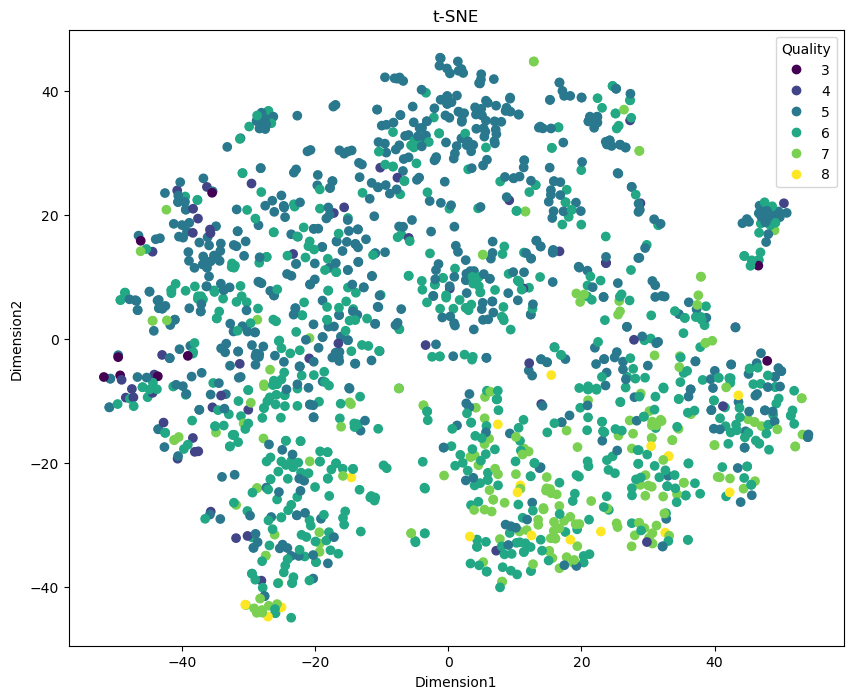

In [14]:
legend=sorted([str(quality) for quality in y.unique()])
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.xlabel("Dimension1")
plt.ylabel("Dimension2")
plt.legend(handles=scatter.legend_elements()[0], 
       labels=legend,
       title="Quality")
plt.title("t-SNE")
plt.show()

In [15]:
# Method 3 -> UMAP
reducer = umap.UMAP()

X_umap = reducer.fit_transform(X_scaled)
X_umap.shape

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(1599, 2)

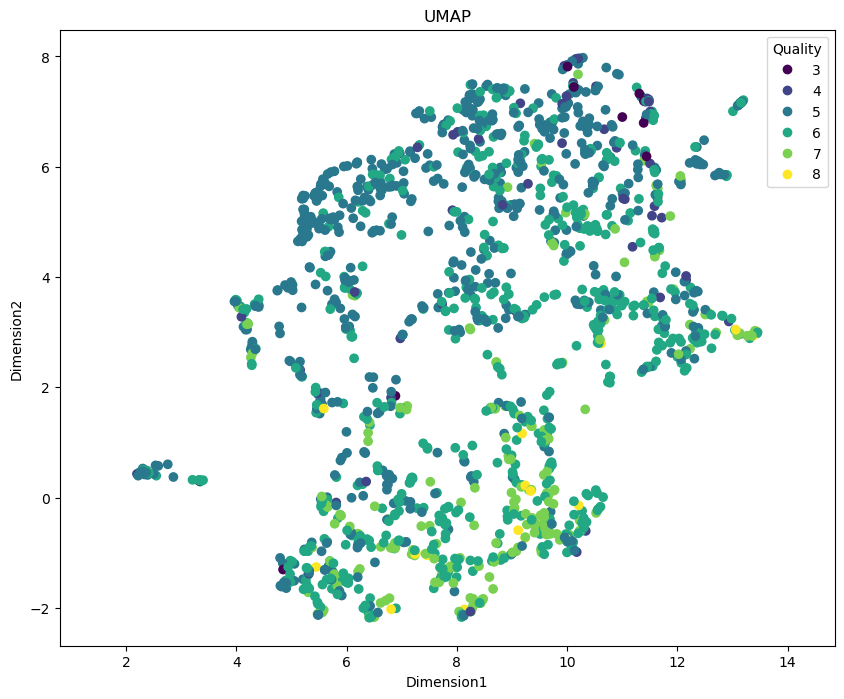

In [16]:
legend=sorted([str(quality) for quality in y.unique()])
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y)
plt.xlabel("Dimension1")
plt.ylabel("Dimension2")
plt.legend(handles=scatter.legend_elements()[0], 
       labels=legend,
       title="Quality")
plt.title("UMAP")
plt.gca().set_aspect('equal', 'datalim')
plt.show()

In [19]:
import pandas as pd
from scipy.stats import f_oneway



# Grouping the data by quality levels
groups = [winequality_df[winequality_df['quality'] == i]['total sulfur dioxide'] for i in range(3, 8)]

# Performing ANOVA
statistic, p_value = f_oneway(*groups)

print("ANOVA Statistic:", statistic)
print("P-value:", p_value)

# Checking significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Total sulfur dioxide significantly affects wine quality.")
else:
    print("Fail to reject the null hypothesis. No significant effect of total sulfur dioxide on wine quality.")


ANOVA Statistic: 30.961102342011547
P-value: 7.5572196200435755e-25
Reject the null hypothesis. Total sulfur dioxide significantly affects wine quality.


In [18]:
# Get the unique values of the quality column
quality_values = winequality_df['quality'].unique()

# print the unique values
print("Unique values of the quality column:", quality_values)

# Grouping the data by quality levels
groups = [winequality_df[winequality_df['quality'] == i]['total sulfur dioxide'] for i in range(3, 8)]

print(groups)

Unique values of the quality column: [5 6 7 4 8 3]
[459     47.0
517     16.0
690     14.0
832     48.0
899     11.0
1299     9.0
1374    29.0
1469    49.0
1478    14.0
1505    12.0
Name: total sulfur dioxide, dtype: float64, 18       29.0
38       19.0
41       46.0
45       65.0
73       43.0
79      119.0
94       85.0
151      69.0
161      20.0
167      42.0
170       8.0
199      31.0
224      55.0
261      67.0
266      61.0
409      49.0
573      47.0
576      14.0
600      23.0
633      86.0
647      14.0
659      13.0
703      84.0
704      14.0
724      12.0
813       7.0
830       9.0
833      51.0
872      48.0
876      14.0
927      75.0
937      26.0
1124     13.0
1176     47.0
1189     19.0
1233     36.0
1235    113.0
1238     24.0
1239     20.0
1261     24.0
1263     26.0
1276     10.0
1293     12.0
1307     29.0
1363     63.0
1369      8.0
1423     31.0
1461     13.0
1467     32.0
1480     13.0
1482      9.0
1484     11.0
1521     23.0
Name: total sulfur dioxide, dtyp